<a href="https://colab.research.google.com/github/NCRibeiro/Aplicativo-LiFE/blob/main/Sistema_de_recomenda%C3%A7%C3%A3o_baseado_em_similaridade_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticação e montagem do drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Buscar e baixar o arquivo
# The file ID is extracted from the URL you provided.
file_id = '1EuBcFszPINsgrWcPCVxkcryLQ2SnJuUO'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('imagem.jpg')

# Carrega um modelo pré-treinado
model = VGG16(weights='imagenet', include_top=False)

# Carrega a imagem do Google Drive
img1_path = 'imagem.jpg'
img1 = image.load_img(img1_path, target_size=(224, 224))
img1_array = image.img_to_array(img1)
img1_array = np.expand_dims(img1_array, axis=0)
img1_array = preprocess_input(img1_array)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Define the 'carregar_imagem' function
def carregar_imagem(caminho_imagem):
  """Carrega e pré-processa uma imagem."""
  img = image.load_img(caminho_imagem, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)
  return img_array

diretorio = '/content/drive/MyDrive/dataset_pessoas'

# Lista para armazenar as features de todas as imagens
todas_features = []
todas_imagens = []

# Carrega todas as imagens e extrai as features
for filename in os.listdir(diretorio):
  if filename.endswith('.jpg') or filename.endswith('.png'):
    caminho_completo = os.path.join(diretorio, filename)
    img_array = carregar_imagem(caminho_completo)
    features = model.predict(img_array)
    todas_features.append(features.flatten())
    todas_imagens.append(caminho_completo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [14]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

from sklearn.metrics.pairwise import euclidean_distances  # Import the function

# Calcula a matriz de distâncias
matriz_similaridade = euclidean_distances(todas_features)

In [15]:
# Função para recomendar imagens
def recomendar_imagens(indice_imagem, k=5):
  indices_similares = matriz_similaridade[indice_imagem].argsort()[1:k+1]
  return indices_similares

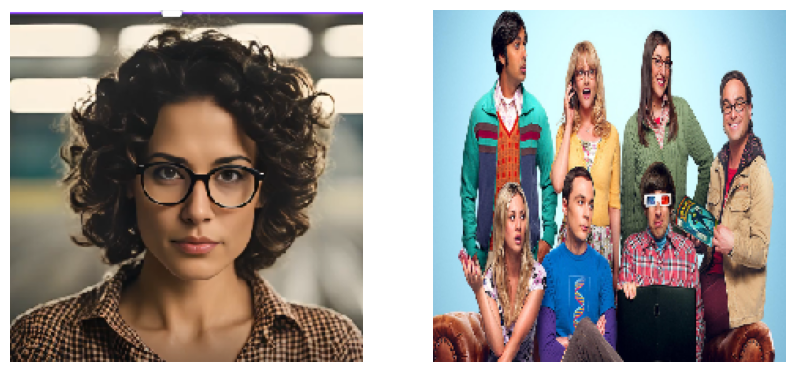

In [17]:
# Recomenda imagens para a primeira imagem (ajuste o índice se quiser outra imagem)
indice_imagem = 0
indices_recomendados = recomendar_imagens(indice_imagem, 5)

# Importa o matplotlib.pyplot
import matplotlib.pyplot as plt

# Visualiza os resultados
def mostrar_imagens(indices):
  plt.figure(figsize=(10, 10))
  for i, indice in enumerate(indices):
    plt.subplot(1, len(indices), i+1)
    img = image.load_img(todas_imagens[indice], target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
  plt.show()

mostrar_imagens(indices_recomendados)